# Breast cancer campaign


**Skills tested:**
- Pandas’ programming.
- Preprocessing in Scikit-Learn.
- Visualization in Seaborn.

**Description**
An insurance company has decided to start a breast cancer campaign for raising awareness about breast cancer.
They feel that the first step for raising awareness is spreading the word about the facts and the statistics of the disease to the public.

**Requirements**
In this part of your project, you are required to:
- Perform exploratory data analysis on the data from the Wisconsin Breast Cancer dataset.
- Visualize the data and show your visualizations.
- Preprocess the dataset to be ready for future work.

## Reading the dataset

In [31]:
import pandas as pd

dat = pd.read_csv('breast-cancer.csv')

dat

print(dat.columns)



Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


## Dropping unneccesary columns 

- I drop the extreme values columns, and aso the area column since it is already explained by radius and perimeter
- also drop the standard error columns

In [75]:
dat = dat.loc[:, 'diagnosis':'fractal_dimension_mean']

dat = dat.loc[:, dat.columns != 'area_mean']

dat



,diagnosis,radius_mean,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,M,20.13,28.25,131.20,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,M,16.60,28.08,108.30,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,M,20.60,29.33,140.10,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


## Preprocessing

### Dealing with missing values

- There are no missing values in the selected variables 

In [76]:
dat.isna().sum()

diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64

### Encoding

We just encode Y since all X data is numeric. I assume B is benign, M is malignant, so it naturally lends itself to being converted to a binary outcome (malignant / not malignant)

In [77]:
# Encode Y
 

from sklearn.preprocessing import LabelEncoder

y = dat.loc[:, 'diagnosis']

encoder = LabelEncoder()

encoder.fit(y)

encoded_y = encoder.transform(y)



### Scaling

Scaling all of our X data

In [78]:
### Scaling 

from sklearn.preprocessing import StandardScaler 

x = dat.loc[:, 'radius_mean':]

scaler = StandardScaler()

scaler.fit(x)

scaled_x = scaler.transform(x)



### Save as a CSV


In [79]:
# First, use pandas DataFrame to reshape data into the appropriate format

col_names = dat.columns

encoded_y_df = pd.DataFrame(encoded_y)

scaled_x_df = pd.DataFrame(scaled_x)

dat_trans = pd.concat([encoded_y_df, scaled_x_df], axis = 1, join='inner')

dat_trans.columns = col_names

# write to CSV on disk

dat_trans.to_csv('cancer_trans.csv', sep=",")

## Visualization

### Pair plots

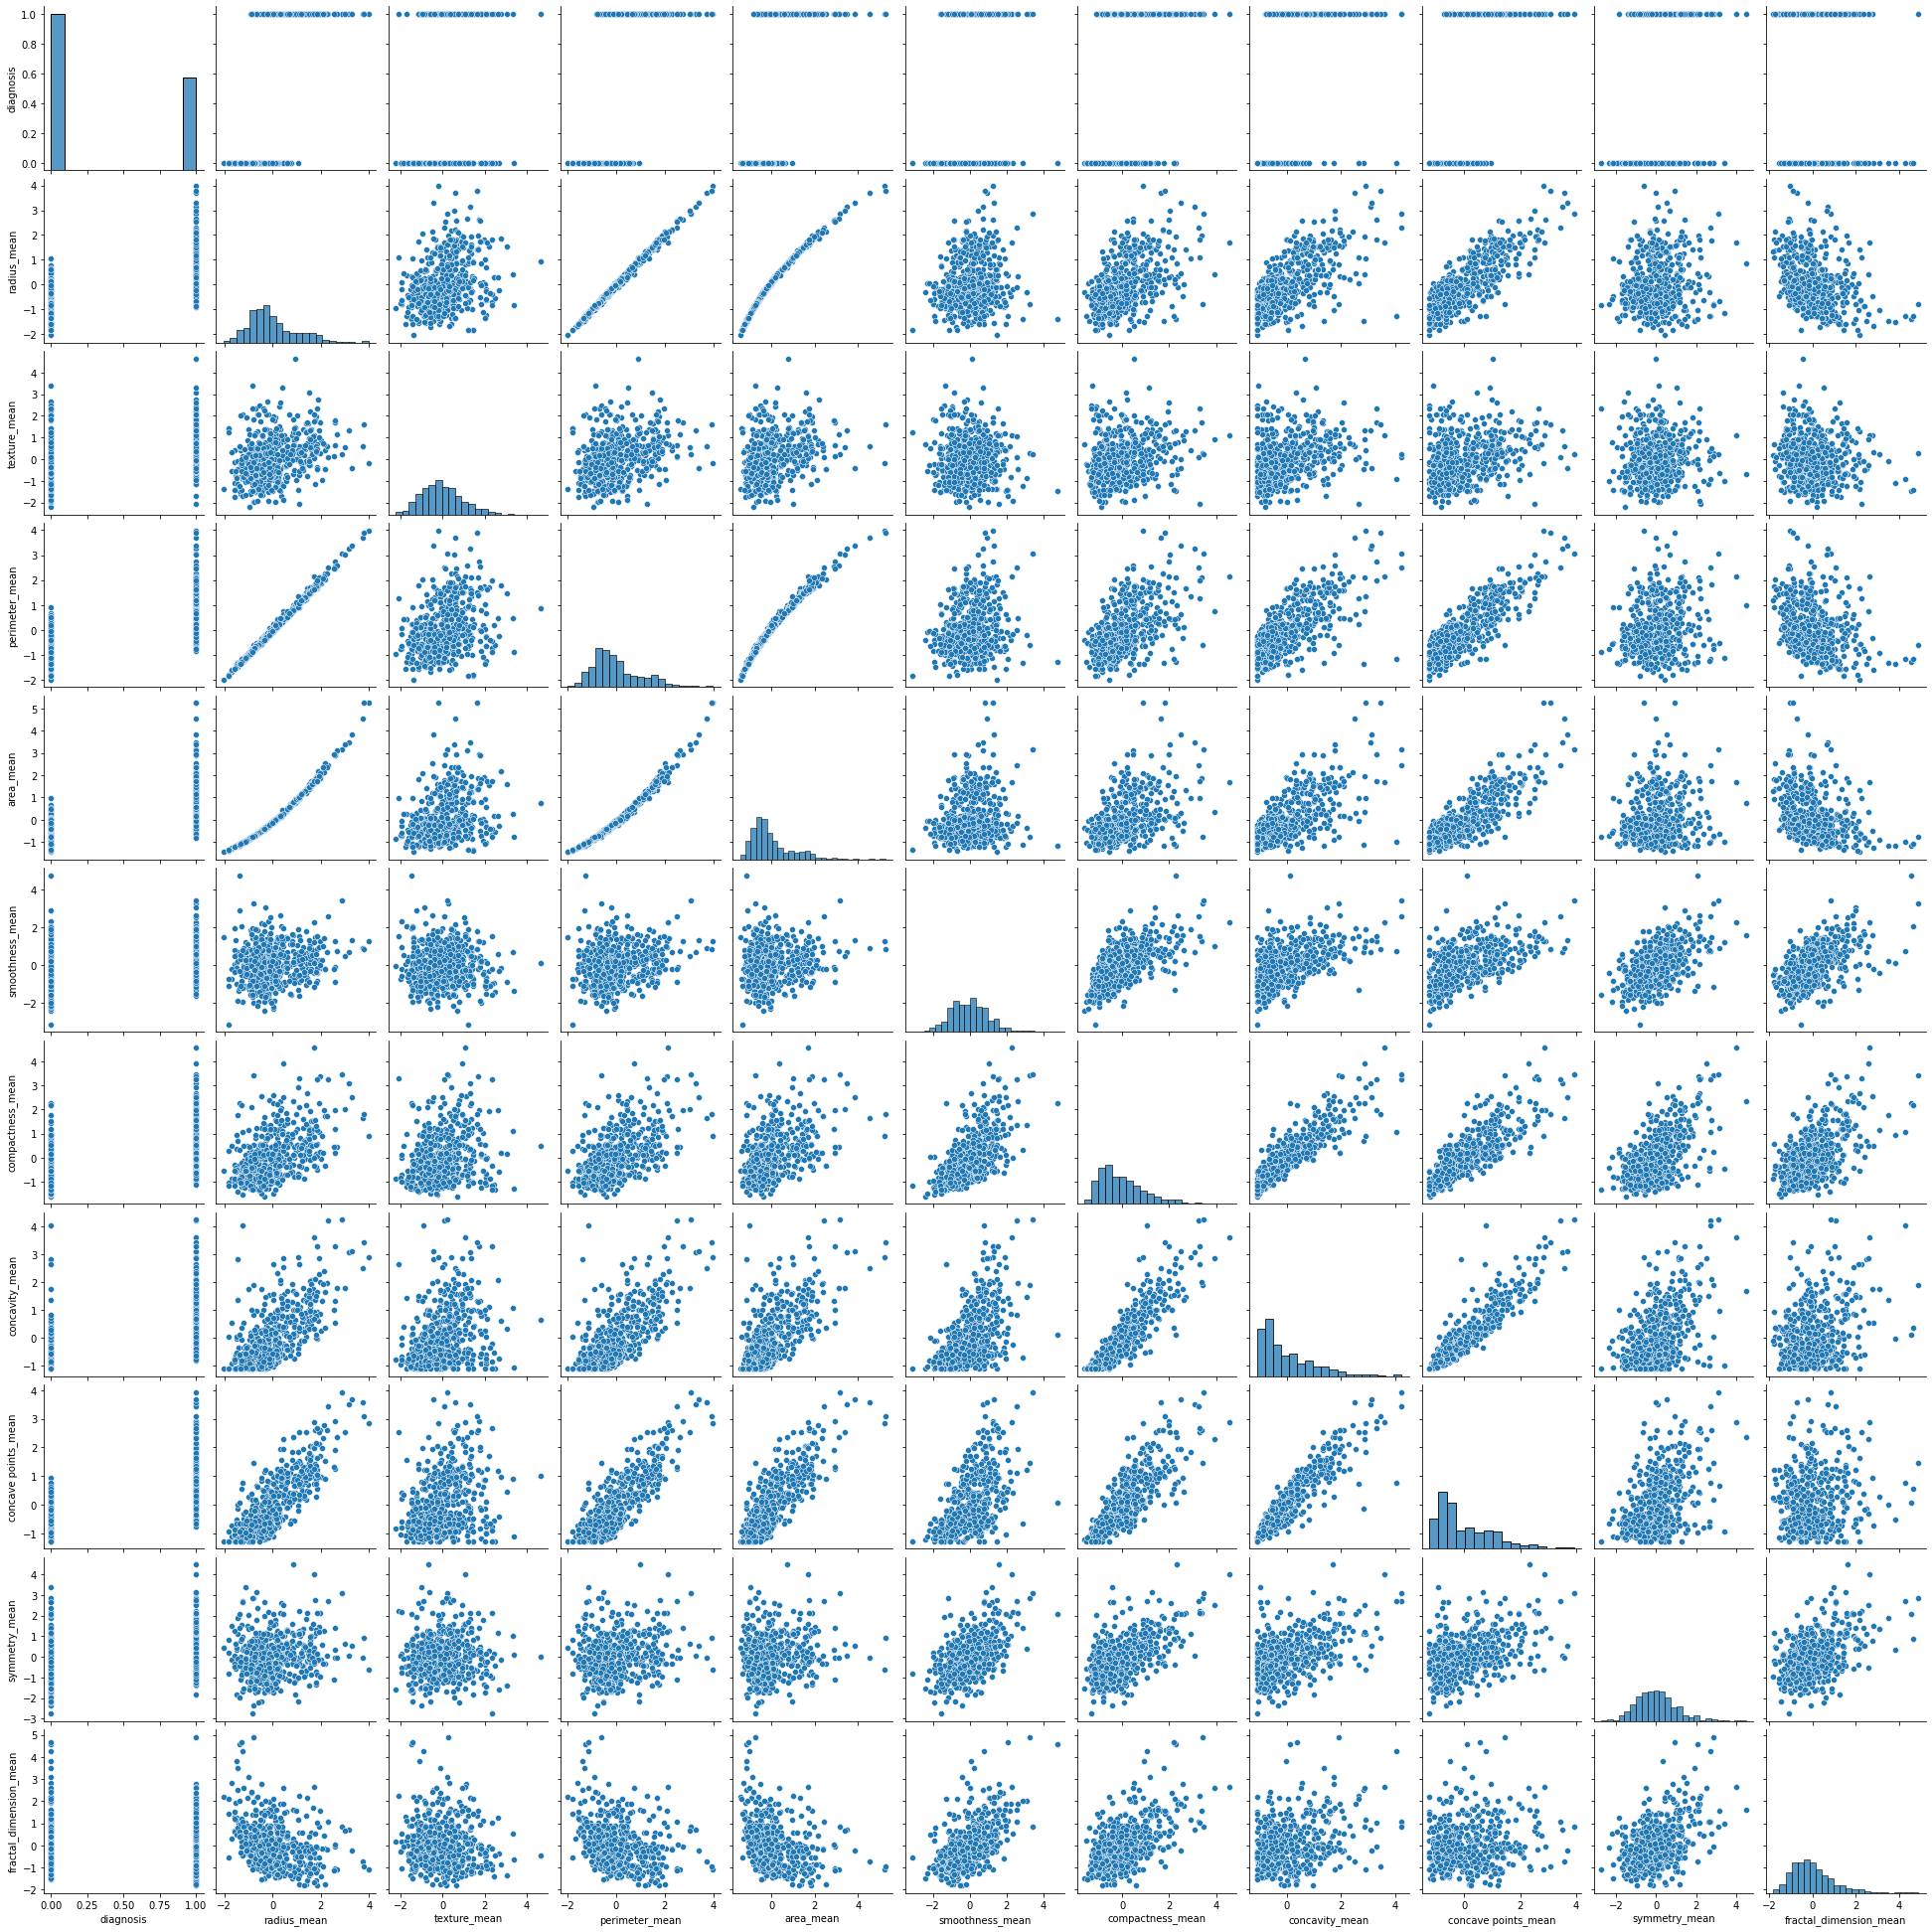

In [71]:
import seaborn as sns

sns.pairplot(dat_trans)

### Correlation matrix heatmap


<AxesSubplot:>

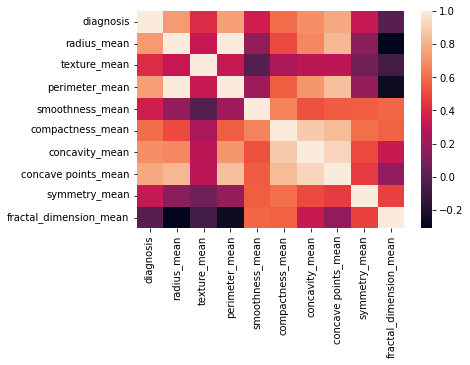

In [80]:
sns.heatmap(dat_trans.corr())

### Box plots

<AxesSubplot:>

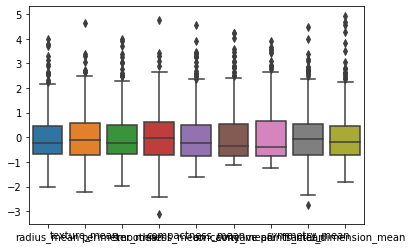

In [86]:
sns.boxplot(data = dat_trans.iloc[:, 1:10])